## Statistikk om lønn

Her ser vi litt på statistikk om et datasett av erfaring og lønn. For det bruker vi pakkene numpy, pandas, plotly og sklearn. 

In [19]:
import numpy as np 
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression

Last inn lønnsdatasettet (data/salary.csv) ved hjelp av `pd.read_csv`. 

In [20]:
# les inn salary data
salary_df = pd.read_csv("data/salary.csv")

Se først på de første 5 radene av datasettet. 

In [21]:
# første 5 rad
salary_df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Så skal vi visualisere data. Hvis du har lastet inn datasette riktig, så skal koden nede kjøre. Vi skal se mer på visualisering senere i kurset, så du trenger ikke å tenke over denne koden. 

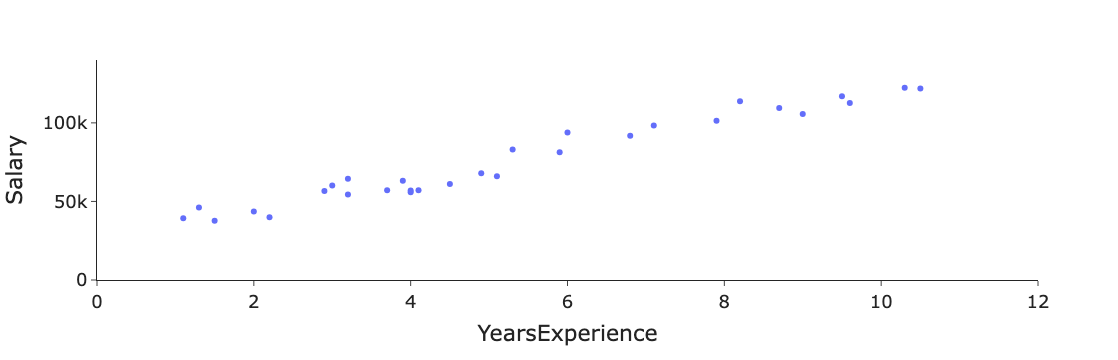

In [22]:
# visualiser salary data
fig = px.scatter(salary_df, 'YearsExperience', 'Salary')
fig.update_layout(font=dict(size=18), template="simple_white", showlegend=False)
fig.update_xaxes(range=[0, 12])
fig.update_yaxes(range=[0, 14e4])
fig.show()

Nå regner vi ut et lokaliseringsmål og spredningsmål for begge variablene. 

In [23]:
lokaliseringsmål = salary_df[['YearsExperience', 'Salary']].agg(['mean', 'median'])
spredningsmål = salary_df[['YearsExperience', 'Salary']].agg(['std', 'var'])

print(lokaliseringsmål)
print(spredningsmål)

        YearsExperience   Salary
mean           5.313333  76003.0
median         4.700000  65237.0
     YearsExperience        Salary
std         2.837888  2.741443e+04
var         8.053609  7.515510e+08


Regn ut korrelasjon mellom de to variablene. 

In [37]:
# korrelasjon
korrelasjon = salary_df['YearsExperience'].corr(salary_df['Salary'])
print(korrelasjon)

0.9782416184887599


Lag og tilpass en regresjonsmodell ved hjelp av [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for å forutse lønn basert på erfaring. Sklearn sine metoder er alle bygget opp på en lignende måte. Først må vi lage en modell (`init`-metode), så må vi tilpasse modellen til treningsdata (`fit`-metode) og til slutt kan vi bruke den til å predikere (`predict`-metode) for nye data eller transformere (`transform`-metode) nye data. 

In [40]:
# lineær modell
lm = LinearRegression()
X = salary_df[['YearsExperience']]  
y = salary_df['Salary']
lm.fit(X, y)

LinearRegression()

Finn ut konstantleddet og stigningstallet til den lineære modellen.

In [41]:
# konstantleddet og stigningstallet
konstantledd = lm.intercept_
stigningstall = lm.coef_[0]
print('Konstantleddet: ', round(konstantledd, 2))
print('Stigningstallet: ', round(stigningstall, 2))

Konstantleddet:  25792.2
Stigningstallet:  9449.96


Hvis du bruker lineær regresjon som prediksjon, hvor stor er feilen på treningsdata?

In [47]:
# feil 
pred = lm.predict(X)
mse = ((y - pred) ** 2).mean()
mae = (abs(y - pred)).mean()
print("MSE ", mse)
print("MAE ", mae)

MSE  31270951.722280968
MAE  4644.2012894435375


Beskriv hva du har funnet i to setninger. 

Mean squarred error er veldig stor, dette skjer fordi vi har veldig store tall, og MSE er dermed en dårlig indikasjon på om modellen er god eller ikke. MAE er ganske liten relativ til hvor store tall som blir brukt, vi kan derfor anta at modellen er ganske nøyaktig.